# Jupyter Data Science Workflow

### From exploratory analytics to reproducible science

In [1]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [2]:
from urllib.request import urlretrieve
urlretrieve(URL, 'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x7f9fa729d100>)

In [3]:
!head Fremont.csv

Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
11/01/2019 12:00:00 AM,12,7,5
11/01/2019 01:00:00 AM,7,0,7
11/01/2019 02:00:00 AM,1,0,1
11/01/2019 03:00:00 AM,6,6,0
11/01/2019 04:00:00 AM,6,5,1
11/01/2019 05:00:00 AM,20,9,11
11/01/2019 06:00:00 AM,97,43,54
11/01/2019 07:00:00 AM,299,120,179
11/01/2019 08:00:00 AM,583,261,322


In [4]:
import pandas as pd
data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


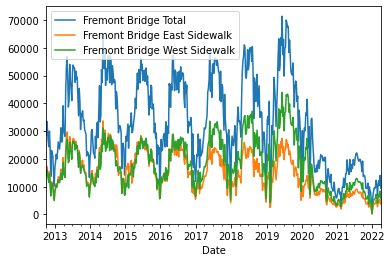

In [5]:
%matplotlib inline
data.resample('W').sum().plot();

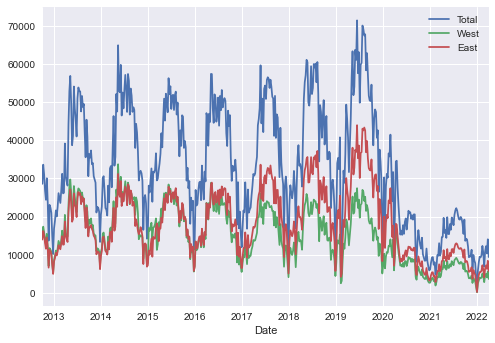

In [6]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

data.columns = ['Total', 'West', 'East']

data.resample('W').sum().plot();

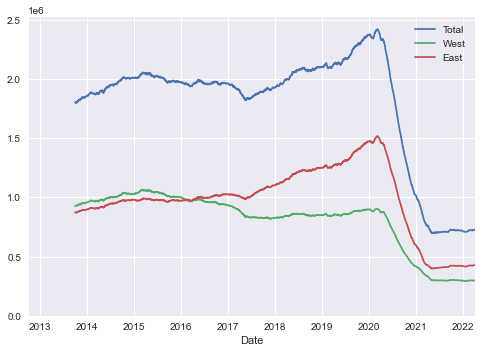

In [7]:
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);

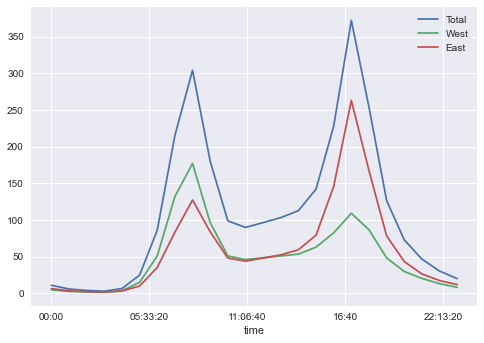

In [8]:
data.groupby(data.index.time).mean().plot();

In [9]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


<AxesSubplot:xlabel='time'>

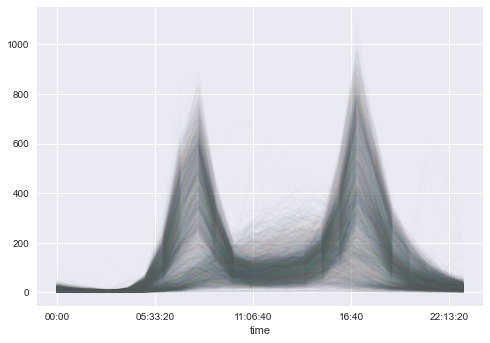

In [10]:
pivoted.plot(legend=False, alpha=0.01)